<a href="https://colab.research.google.com/github/DenisseUrenda/MachineLearning/blob/main/L06_Normalizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tipo de variables

En estadística existen cuatro tipos de datos, y por lo tanto de variables. Las variables son clasificadas principalmente en dos tipos: cualitativas y cuantitativas, o categorías y numéricas, respectivamente.



## Variables categorías

Variables que almacenan datos que describen alguna característica o cualidad. Estas variables pueden ser clasificadas en dos tipos

- **Nominal**: las categorías no tienen un orden natural. Ej; sexo, estado civil, religión.

- **Ordinal**: las categorías siguen un orden natural. Estas tienen una jerarquía implícita. Ej; escolaridad, nivel de satisfacción, estatus social.


## Variables numéricas

Estas variables almacenan datos que suelen representar medidas. Hay dos tipos de variables numéricas:

- **Discreta**: suelen ser números enteros. No hay valores entre dos datos adyacentes. Ej; número de hijos, semestre en curso.

- **Continuas**: estas variables pueden tomar todos los valores dentro de un intervalo de números. Ej; edad, ingreso, temperatura, peso.

# Métodos de preprocesamiento

Muchos de los algoritmos de machine learning son sensibles a la escala de los datos. Esto es, pueden dan diferente resultado dependiendo de las unidades de cada una de las variables. Para ...

Dependiendo del tipo de variable es el tipo de escalamiento que usaremos. Si la variable es nominal podemos usar un método conocido como *One Hot Encoding*. Para variables ordinales es posible reemplazar las categorias con los números $1,\cdots,k$ para preservar el orden natural de los datos. Cuando las variables son numéricas, es posible utilizar tres técnicas: la *escalación*, la *normalización* o la *estandarización*.

## Codificación ordinal

Esta es la más sencilla de todas pero en ocaciones es mal utilizada. Esta consiste en reemplazar cada categoría por un número entero entre $1$ y $k$ donde $k$ es el número de categorías. Esto es recomendable solo cuando la variable es ordinal, pues al tener un orden jerárquico natural, el uso de números consecutivos (donde uno es más grande que otro) tiene completo sentido.

Veamos un ejemplo.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Definiendo columnas del df
info = {
    'nombre':    ['Denisse', 'Adrian', 'Diego', 'Victoria', 'Paula'],
    'salario':   [35000, 40000, 25000, 30000, 25000],
    'idioma':    ['Español', 'Inglés', 'Inglés', 'Francés', 'Español'],
    'educacion': ['Secundaria', 'Preparatoria','Primaria','Licenciatura','Primaria']
}
df = pd.DataFrame(info)
df.head()

,nombre,salario,idioma,educacion
0,Denisse,35000,Español,Secundaria
1,Adrian,40000,Inglés,Preparatoria
2,Diego,25000,Inglés,Primaria
3,Victoria,30000,Francés,Licenciatura
4,Paula,25000,Español,Primaria


El conjunto de datos anterior tiene tres tipos de variables: numérica (`salario`), nominal (`idioma`) y ordinal (`educacion`).

Codifiquemos la variable `educacion` con la codificación ordinal.


In [ ]:
dfcopy = df.copy()
etiquetas = {
    'Primaria':1,
    'Secundaria':2,
    'Preparatoria':3,
    'Licenciatura':4
}
dfcopy.educacion.replace(etiquetas, inplace=True)
dfcopy

,nombre,salario,idioma,educacion
0,Denisse,35000,Español,2
1,Adrian,40000,Inglés,3
2,Diego,25000,Inglés,1
3,Victoria,30000,Francés,4
4,Paula,25000,Español,1


Otra forma de hacerlo es usando el paquete `sklearn`.



In [ ]:
from sklearn.preprocessing import OrdinalEncoder

dfcopy = df.copy()
cats = ['Primaria','Secundaria','Preparatoria','Licenciatura']
encoder = OrdinalEncoder(categories=[cats])
edu_codificada = encoder.fit_transform(np.array(dfcopy.educacion).reshape(-1,1))
edu_codificada

array([[1.],
       [2.],
       [0.],
       [3.],
       [0.]])

In [ ]:
dfcopy['educacion'] = edu_codificada
dfcopy

,nombre,salario,idioma,educacion
0,Denisse,35000,Español,1.0
1,Adrian,40000,Inglés,2.0
2,Diego,25000,Inglés,0.0
3,Victoria,30000,Francés,3.0
4,Paula,25000,Español,0.0


## One-Hot Encoding

One Hot Encoding es una técnica para convertir cualquier variable nominal en numérica. Consiste en crear tantas variables binarias (0/1) como categorías que tiene la variable nominal. La nueva variable $i$ valdrá 1 cuando el registro tenga la categoría $i$ y valdrá 0 en cualquier otro caso.

Veamos un ejemplo con el conjunto de datos `df` y la variable nominal `idioma`. Una forma incorrecta de codificar esta variable es usar la codificacion ordinal pues en esta variable las categorías no tienen un orden natural.

In [ ]:
# Forma incorrecta de codificar variables nominales
etiquetas = {
   'Español': 1,
   'Inglés': 2,
   'Francés': 3
}
dfcopy = df.copy()
dfcopy.idioma.replace(etiquetas, inplace=True)
dfcopy

,nombre,salario,idioma,educacion
0,Denisse,35000,1,Secundaria
1,Adrian,40000,2,Preparatoria
2,Diego,25000,2,Primaria
3,Victoria,30000,3,Licenciatura
4,Paula,25000,1,Primaria


La forma correcta es usar el codificador One-Hot

In [ ]:
def encode(x):
    labels = x.unique()
    df = np.zeros((len(x), len(labels)))
    for i, label in enumerate(labels):
        idx = np.where(x == label)[0]
        df[idx, i] = 1
    df = pd.DataFrame(df, columns=labels)
    return df


dfcopy = df.copy()
idioma_codificado = encode(dfcopy.idioma)
idioma_codificado

,Español,Inglés,Francés
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [ ]:
dfcopy = pd.concat([dfcopy.iloc[:, [0,1,3]], idioma_codificado], axis=1)
dfcopy

,nombre,salario,educacion,Español,Inglés,Francés
0,Denisse,35000,Secundaria,1.0,0.0,0.0
1,Adrian,40000,Preparatoria,0.0,1.0,0.0
2,Diego,25000,Primaria,0.0,1.0,0.0
3,Victoria,30000,Licenciatura,0.0,0.0,1.0
4,Paula,25000,Primaria,1.0,0.0,0.0


Toma en cuenta que esto aumenta considerablemente la dimensionaldad del conjunto por lo que si hay muchas categorías en la variable nominal, tal vez no sea una buena idea hacer One-Hot encoding.

Veamos ahora como podemos hacerlo con `sklearn`.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

codificador = OneHotEncoder()
idioma_codificado = codificador.fit_transform(np.array(df.idioma).reshape(-1,1)).toarray()
idioma_codificado

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [ ]:
onehot = pd.DataFrame(idioma_codificado, columns=['Español','Inglés', 'Francés'])
dfcopy = pd.concat([df.iloc[:,[0,1,3]], onehot], axis=1)
dfcopy

,nombre,salario,educacion,Español,Inglés,Francés
0,Denisse,35000,Secundaria,1.0,0.0,0.0
1,Adrian,40000,Preparatoria,0.0,0.0,1.0
2,Diego,25000,Primaria,0.0,0.0,1.0
3,Victoria,30000,Licenciatura,0.0,1.0,0.0
4,Paula,25000,Primaria,1.0,0.0,0.0


## Escalación, Normalización y Estandarización

En la **escalación** de los datos cada variable numérica se transforma de tal manera que los valores de encuentran en el intervalo [0,1]. Esto se realiza con la fórmula
$$
x_{\text{scaler}} = \frac{x - x_{\text{min}}}{x_{\text{max}}-x_{\text{min}}}
$$

En la **normalización** de los datos las columnas son transformadas de forma que su norma es uno. Es decir,
$$
x_{\text{norm}} = \frac{x}{||x||}
$$
dónde $||x||$ puede ser cualquier norma, usualmente la euclideana, es decir,
$$
||x||^2=\sum_{i=1}^nx_i^2.
$$
Finalmente, en la **estandarización** cada columna es transformada de forma que su media es cero y desviación estándar uno. Para lograr esto se usa la fórmula
$$
x_{\text{std}}=\frac{x-\bar x}{s_x}
$$
dónde $s_x$ es la desviación estándar de la columna $x$.

In [ ]:
def scale(x):
    minx = x.min()
    maxx = x.max()
    res = (x - minx)/(maxx - minx)
    return res


def normalize(x, p=2):
    norm = (abs(x)**p).sum() ** (1/p)
    res = x / norm
    return res


def standardize(x):
    res = (x - x.mean())/x.std()
    return res

In [ ]:
df = pd.DataFrame(np.random.normal(loc=10, size=(6,3)), columns=['A', 'B', 'C'])
df

,A,B,C
0,10.569705,9.635044,9.728610
1,7.630213,9.211937,10.618796
2,10.616003,10.120590,10.746167
3,11.338735,9.893523,10.101049
4,9.327824,10.712394,9.091010
5,10.977609,11.541085,10.799412


In [ ]:
# Dataset escalado
df.apply(scale)

,A,B,C
0,0.792632,0.181657,0.373214
1,0.000000,0.000000,0.894278
2,0.805116,0.390122,0.968833
3,1.000000,0.292633,0.591219
4,0.457759,0.644208,0.000000
5,0.902623,1.000000,1.000000


In [ ]:
# Dataset normalizado
df.apply(normalize)

,A,B,C
0,0.424928,0.385108,0.389397
1,0.306753,0.368197,0.425027
2,0.426789,0.404515,0.430126
3,0.455845,0.395439,0.404304
4,0.375001,0.428169,0.363876
5,0.441327,0.461291,0.432257


In [ ]:
# Dataset estandarizado
df.apply(standardize)

,A,B,C
0,0.357971,-0.662457,-0.667848
1,-1.776315,-1.171411,0.646765
2,0.391587,-0.078396,0.834865
3,0.916343,-0.351533,-0.117835
4,-0.543725,0.633483,-1.609445
5,0.654139,1.630314,0.913497


Ahora hagámoslo con el paquete `sklearn`.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

In [ ]:
pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)

,A,B,C
0,0.792632,0.181657,0.373214
1,0.000000,0.000000,0.894278
2,0.805116,0.390122,0.968833
3,1.000000,0.292633,0.591219
4,0.457759,0.644208,0.000000
5,0.902623,1.000000,1.000000


In [ ]:
pd.DataFrame(Normalizer().fit_transform(df.T), index=df.columns).T

,A,B,C
0,0.424928,0.385108,0.389397
1,0.306753,0.368197,0.425027
2,0.426789,0.404515,0.430126
3,0.455845,0.395439,0.404304
4,0.375001,0.428169,0.363876
5,0.441327,0.461291,0.432257


Nota que hemos usado el método `.T` pues `Normalizer()` normaliza los renglones no las columnas por lo que tenemos que trasponer el df (convertir columnas en renglones), luego para invertir esta operación debemos de volver a trasponer.

In [ ]:
pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)

,A,B,C
0,0.392138,-0.725685,-0.731590
1,-1.945856,-1.283217,0.708496
2,0.428962,-0.085878,0.914548
3,1.003804,-0.385086,-0.129081
4,-0.595621,0.693946,-1.763059
5,0.716574,1.785919,1.000686


Nota que los resultados de la estandarización con `sklearn` son ligeramente distintos a los obtenidos por nosotros mismos y esto es porque `StandardScaler()` usa la versión no sesgada de la desviación estándar
$$
s=\sqrt{\frac{\sum_{i=1}^n(x_i-\bar x)^2}{n-1}}
$$
en lugar de la que usa `numpy` cuyo denominador es $n$.

Comparemos gráficamente que es lo que ocurre con el conjunto de datos en sus diferentes tipos de escalamiento.

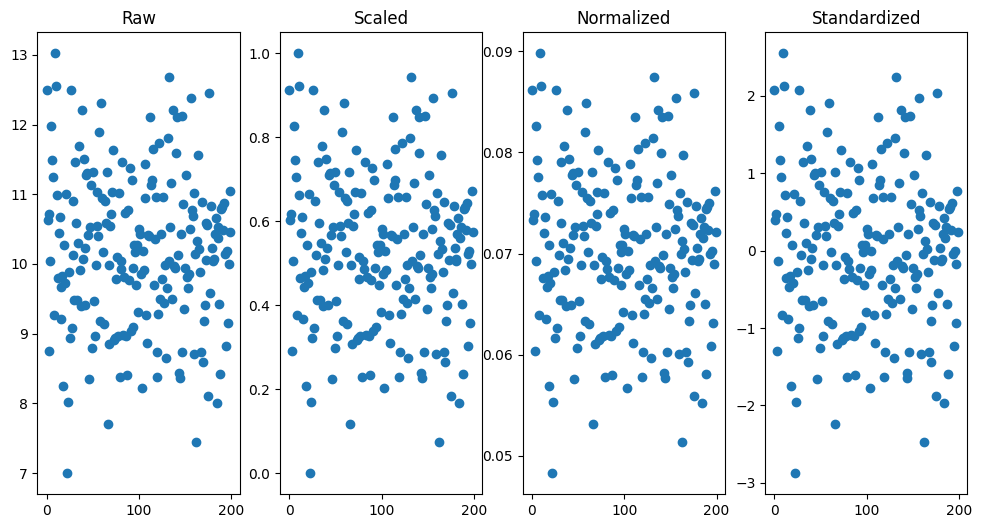

In [ ]:
import matplotlib.pyplot as plt

scalers = (lambda x: x, scale, normalize, standardize)
titles = ['Raw', 'Scaled', 'Normalized', 'Standardized']

x = np.random.normal(loc=10, size=200)

fig, ax = plt.subplots(1,4, figsize=(12, 6))

for i in range(len(scalers)):
    ax[i].scatter(np.arange(len(x)), scalers[i](x))
    ax[i].set_title(titles[i])

Observa que las imagenes parecen ser idénticas, y lo son, a excepción de la escala en el eje $y$.